# Import

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


#Models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

# Functions

In [2]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds, y_test))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

In [3]:
def plot_tree2(xgb_model, filename, rankdir='UT'):
    """
    Plot the tree in high resolution
    :param xgb_model: xgboost trained model
    :param filename: the pdf file where this is saved
    :param rankdir: direction of the tree: default Top-Down (UT), accepts:'LR' for left-to-right tree
    :return:
    """
    import xgboost as xgb
    import os
    gvz = xgb.to_graphviz(xgb_model, rankdir=rankdir)
    _, file_extension = os.path.splitext(filename)
    format = file_extension.strip('.').lower()
    data = gvz.pipe(format=format)
    full_filename = filename
    with open(full_filename, 'wb') as f:
        f.write(data)
    

In [4]:
# Cross Validation for Classification
# Use StratifiedKFolds for Classification Problems
def cross_val_class(model, X_train, y_train): 
    """
    Perform Cross Validation with Stratified KFold
    :param model: trained model
    :param X_train: features for training
    :param y_train: labels for training
    """
    skf = StratifiedKFold(5, shuffle=True, random_state=1)
    accuracies = cross_val_score(estimator = XG, X = X_train, y = y_train, cv = skf, scoring='accuracy')
    #print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    #print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print(accuracies)

In [5]:
# Cross Validation for Regression
# Use KFolds for Regression Problems
def cross_val_reg(model, X_train, y_train): 
    """
    Perform Cross Validation with Stratified KFold
    :param model: trained model
    :param X_train: features for training
    :param y_train: labels for training
    """
    kf = KFold(5, shuffle=True, random_state=1)
    accuracies = cross_val_score(estimator = XG, X = X_train, y = y_train, cv = kf, scoring='r2')
    #print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    #print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print(accuracies)

# Preprocesing

In [6]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Visualization

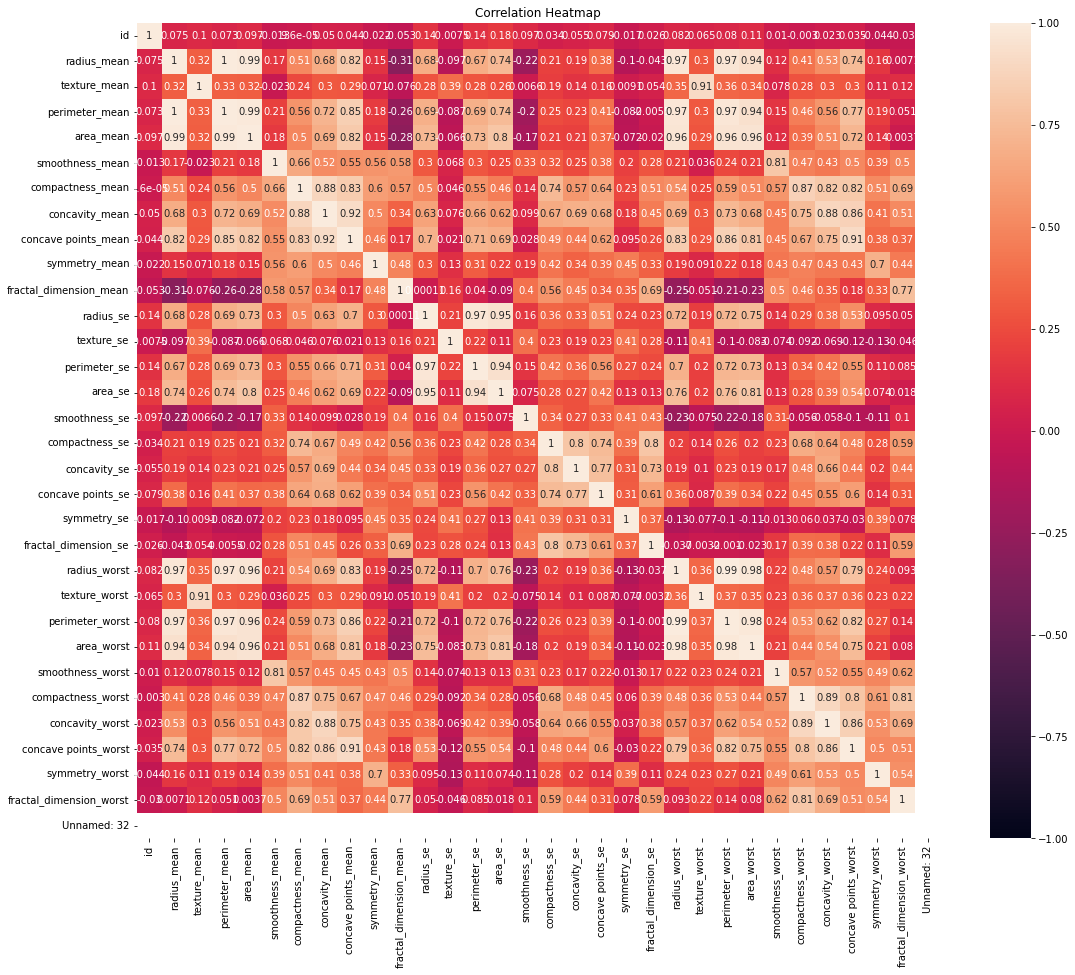

In [8]:
corr = data.corr()

plt.figure(figsize =(18,15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='rocket')
plt.title('Correlation Heatmap')
plt.show()

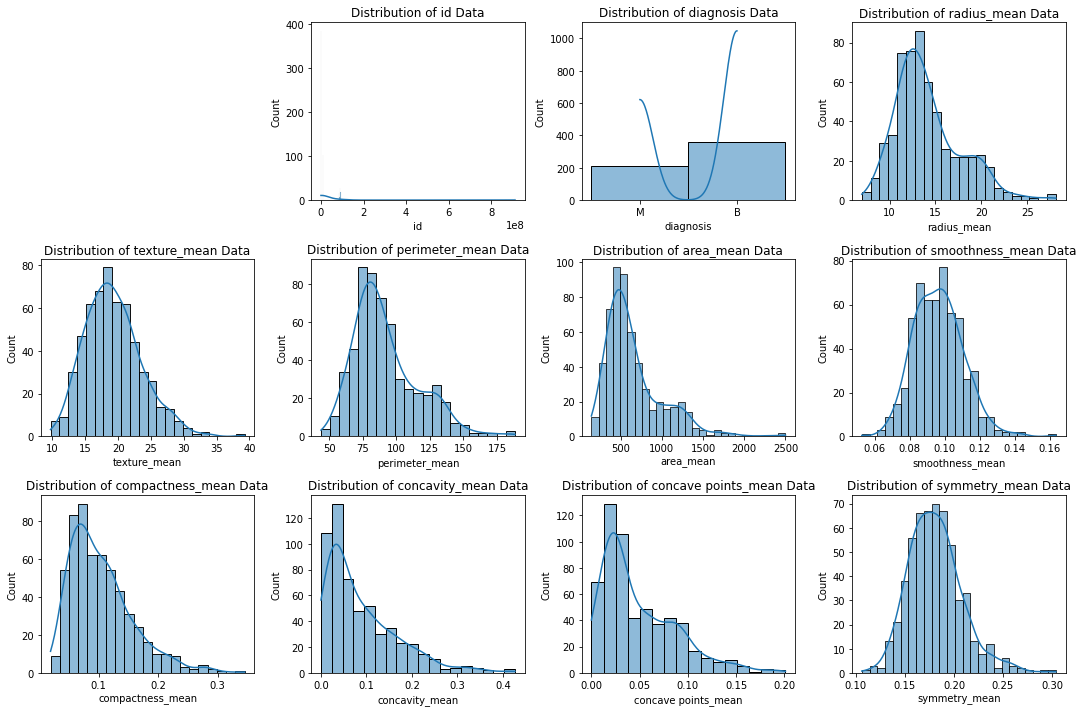

In [9]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):   
    try:
        plt.subplot(3,4,i+1)
        plt.title(f"Distribution of {col} Data")
        sns.histplot(data[col],kde=True)
        plt.tight_layout()
        plt.plot()  
    except ValueError:
        break

<AxesSubplot:ylabel='diagnosis'>

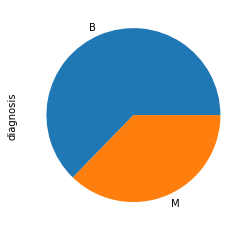

In [10]:
data.diagnosis.value_counts().plot(kind='pie')

# Preprocessing

In [11]:
string_col = data.select_dtypes(include="object").columns
data[string_col]=data[string_col].astype("string")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    string 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
data.drop(['id','Unnamed: 32'], axis=1, inplace=True) #drop id 
y = data['diagnosis'].copy()
X = data.drop('diagnosis', axis=1).copy()

In [14]:
le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(y))

#1 - M, 0 - B

# Training & Evaluation

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=143)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       117
           1       0.92      1.00      0.96        54

    accuracy                           0.97       171
   macro avg       0.96      0.98      0.97       171
weighted avg       0.97      0.97      0.97       171



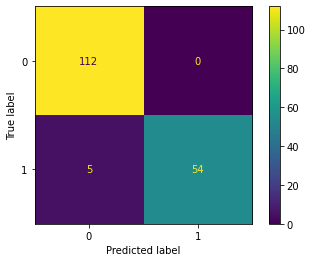

In [16]:
# Confusion Matrix
XG = XGBClassifier()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_test)
report(XG)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.98      0.90      0.94       122
           1       0.80      0.96      0.87        49

    accuracy                           0.92       171
   macro avg       0.89      0.93      0.91       171
weighted avg       0.93      0.92      0.92       171



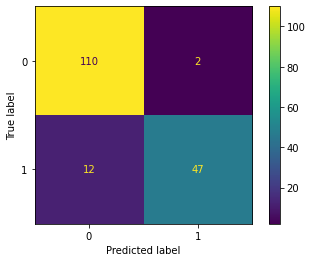

In [17]:
# Confusion Matrix SVC
SVC = SVC()
SVC.fit(X_train, y_train)
y_pred_SVC = SVC.predict(X_test)
report(SVC)

ROC Curve

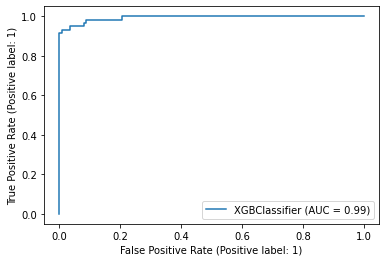

In [18]:
XG_disp = RocCurveDisplay.from_estimator(XG, X_test, y_test)
plt.show()

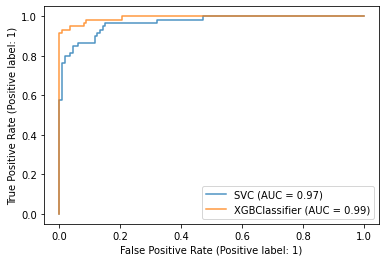

In [19]:
ax = plt.gca()
SVC_disp = RocCurveDisplay.from_estimator(SVC, X_test, y_test, ax=ax, alpha=0.8)
XG_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [20]:
cross_val_class(XG, X_train, y_train)

[0.9375     0.9625     0.95       0.96202532 0.97468354]


# Additional Charts

<Figure size 1440x1440 with 0 Axes>

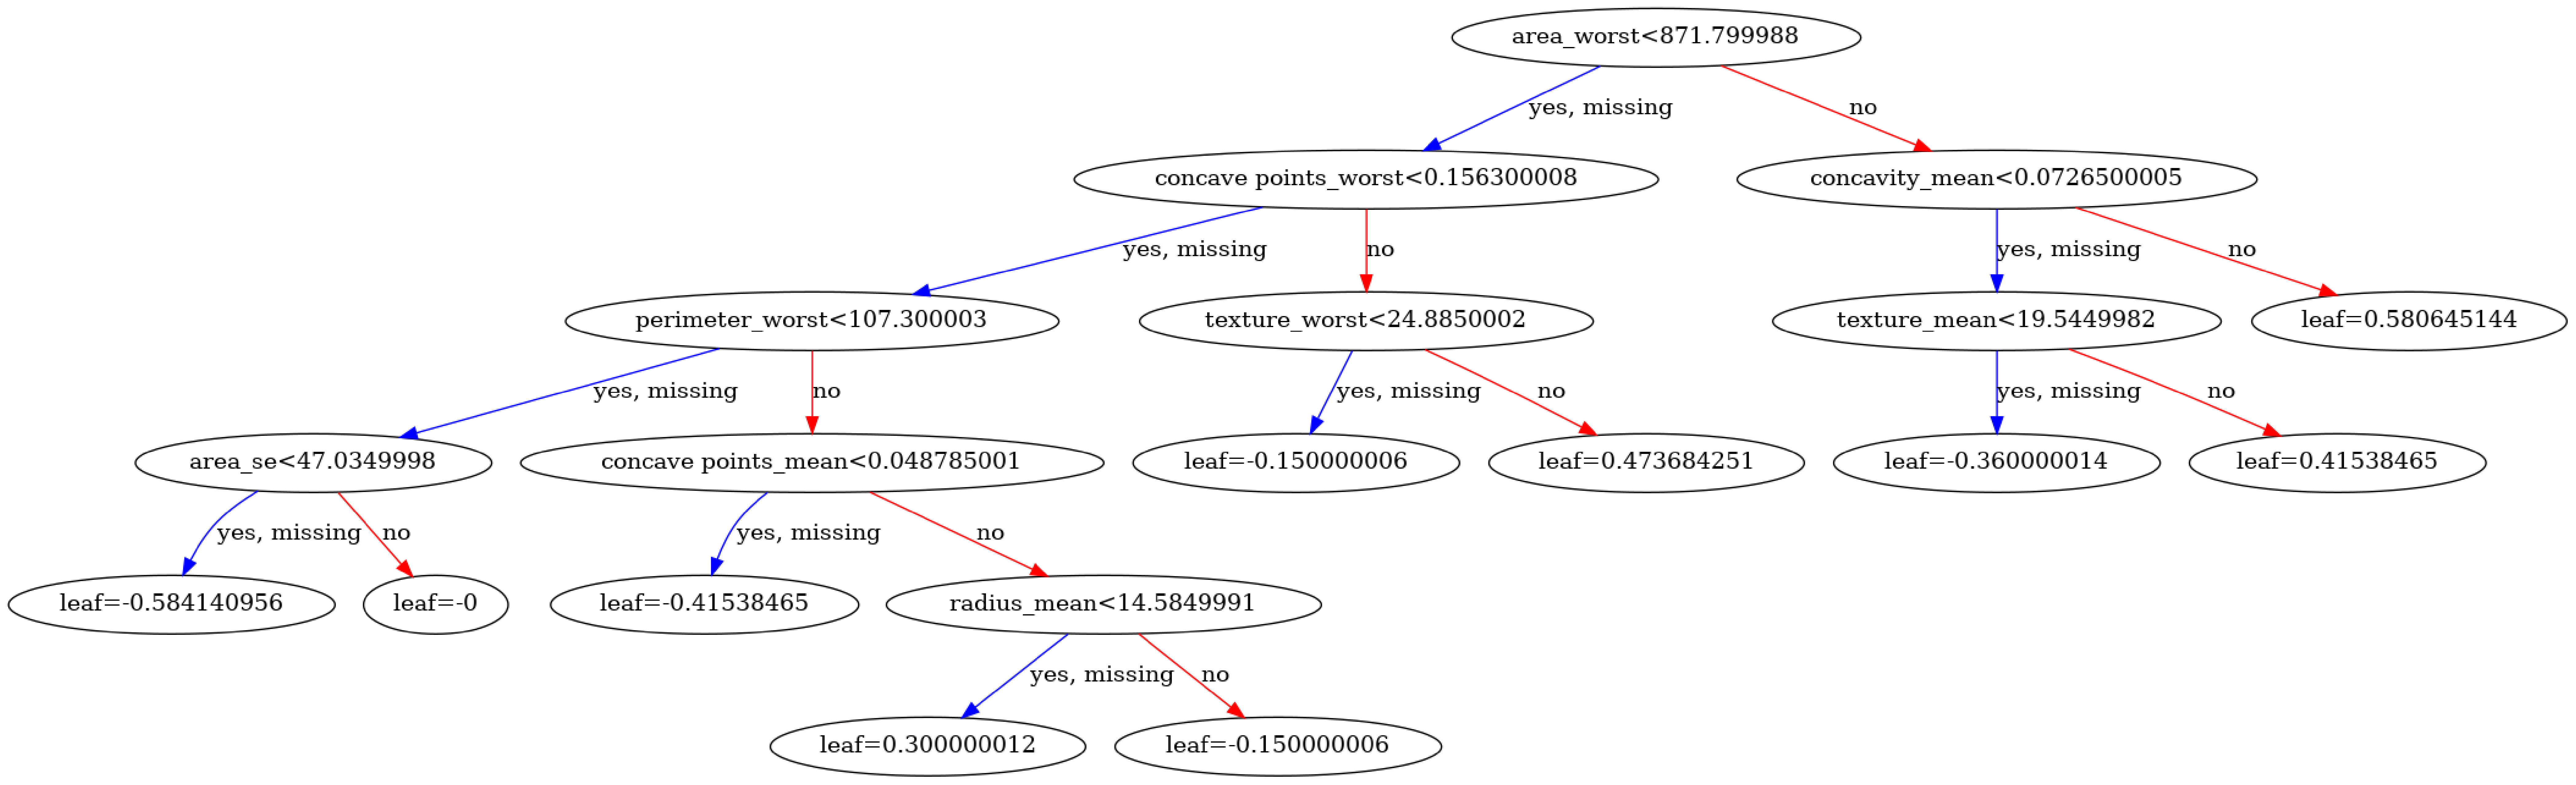

In [21]:
plt.figure(figsize=(20,20))
plot_tree(XG, fontsize=20)
fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.show()